In [10]:
import pandas as pd

#### Loading cleaned data for analysis

In [11]:
df = pd.read_csv('../data_clean/Cleaned_StudentsPerformance.csv')

print(df.to_string())

     Unnamed: 0  gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0             0  female        group B           bachelor's degree      standard                    none          72             72             74
1             1  female        group C                some college      standard               completed          69             90             88
2             2  female        group B             master's degree      standard                    none          90             95             93
3             3    male        group A          associate's degree  free/reduced                    none          47             57             44
4             4    male        group C                some college      standard                    none          76             78             75
5             5  female        group B          associate's degree      standard                    none          71  

#### Creating new column Percentage from all available three scores(math,reading and writing), then finding grade by using avg scores

In [12]:
df["Percentage"]=(df["math score"]+df["reading score"]+df["writing score"])/3
print(df["Percentage"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [13]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3
print(df["Percentage"])


def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]),axis=1)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [14]:
print(df)

     Unnamed: 0  gender race/ethnicity parental level of education  \
0             0  female        group B           bachelor's degree   
1             1  female        group C                some college   
2             2  female        group B             master's degree   
3             3    male        group A          associate's degree   
4             4    male        group C                some college   
..          ...     ...            ...                         ...   
995         995  female        group E             master's degree   
996         996    male        group C                 high school   
997         997  female        group C                 high school   
998         998  female        group D                some college   
999         999  female        group D                some college   

            lunch test preparation course  math score  reading score  \
0        standard                    none          72             72   
1        standa

### importing required pacakages for analysis

In [15]:
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

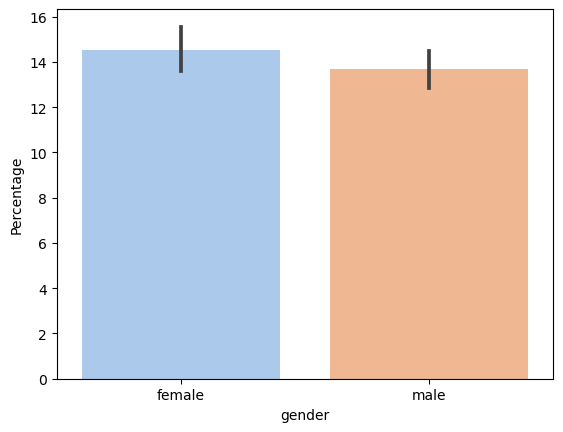

In [16]:
sns.barplot(x ='gender', y ='Percentage', data = df,
            palette ='pastel', estimator = np.std)

In [17]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [18]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x190ae7ec670>,
 [Text(-1.1980818587083752, -0.06782226650507366, 'Female'),
  Text(1.1980818587083752, 0.0678222665050735, 'Male')],
 [Text(-0.698881084246552, -0.03956298879462629, '51.80%'),
  Text(0.698881084246552, 0.039562988794626205, '48.20%')])

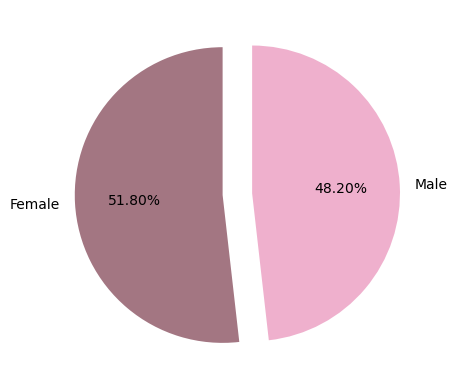

In [14]:
labels=['Female', 'Male']

plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#A37682','#EFB0CD'], startangle=90)

#### The below countplot illustares the grade secured by female and male  

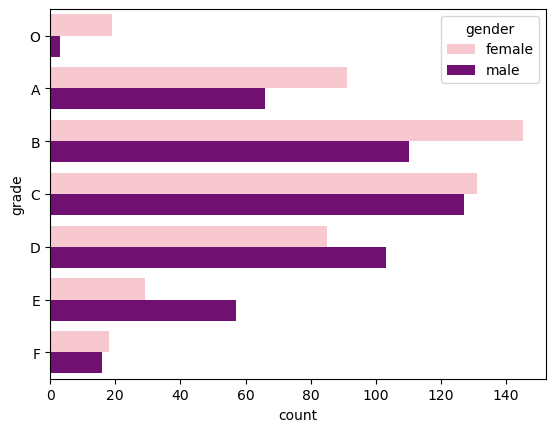

In [19]:
custom_palette = ["pink", "purple"]

ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"],palette=custom_palette)
fig=ax.get_figure()
fig.savefig("../Results/Grade_Analysis_with_gender.png")


#### The below plot illustares the grades secured by students grouped by ethinicity

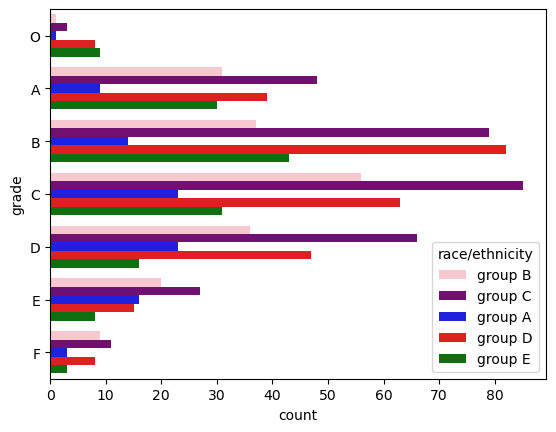

In [20]:
custom_palette = ["pink", "purple","blue","red","green"]

ax = sns.countplot(y="grade", hue="race/ethnicity", data=df, order=["O","A","B","C","D","E","F"],palette=custom_palette)
fig=ax.get_figure()
fig.savefig("../Results/Grade_Analysis_with_race.png")

#### The below plot illustates the gardes secured by students and their parents; level of education

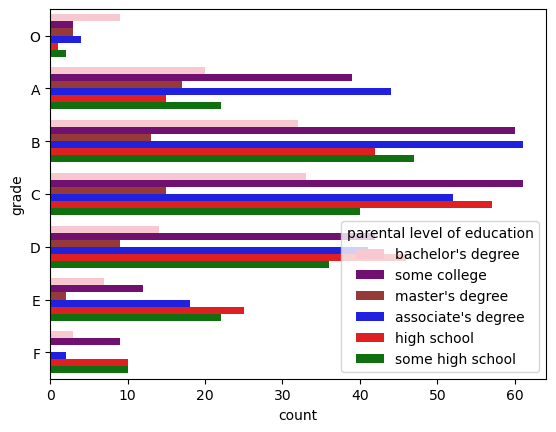

In [21]:
custom_palette = ["pink", "purple","brown","blue","red","green"]
ax = sns.countplot(y="grade", hue="parental level of education", data=df, order=["O","A","B","C","D","E","F"],palette=custom_palette)
fig=ax.get_figure()
fig.savefig("../Results/Grade_Analysis_with_Parentaleducation.png")

#### The below plot illustrates the grade secured by students grouped by their lunch. It shows how lunch effects teh student poerformance.

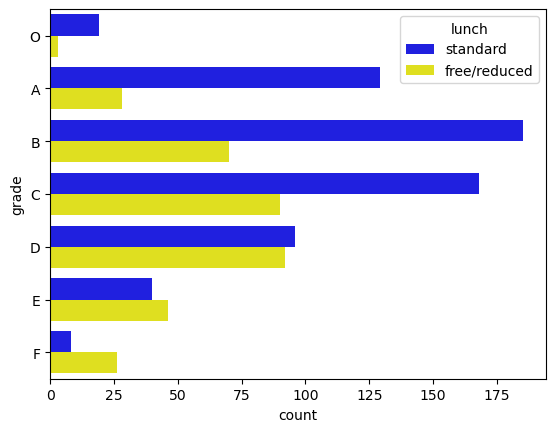

In [22]:
custom_palette = ["blue", "yellow"]
ax = sns.countplot(y="grade", hue="lunch", data=df, order=["O","A","B","C","D","E","F"],palette=custom_palette)
fig=ax.get_figure()
fig.savefig("../Results/Grade_Analysis_with_lunch.png")

#### The below count plot illustrates hoe course completion effects the student grade

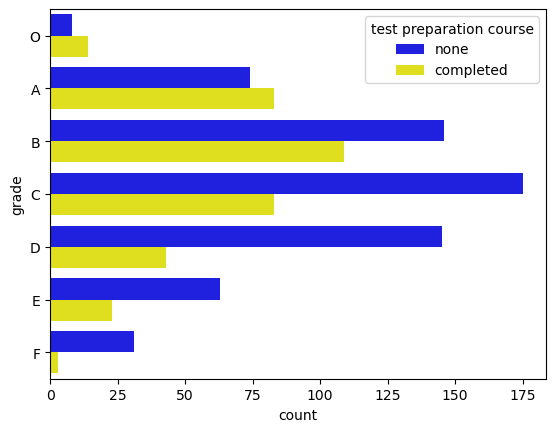

In [23]:
custom_palette = ["blue", "yellow"]
ax = sns.countplot(y="grade", hue="test preparation course", data=df, order=["O","A","B","C","D","E","F"],palette=custom_palette)
fig=ax.get_figure()
fig.savefig("../Results/Grade_Analysis_with_testprepartion.png")

#### The below plot illustrates the distibution of avg marks or percentage of score secured by all students and also we can see the students who scored percentage between 50 to 80.

C:\Users\sowmy\.ipython\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


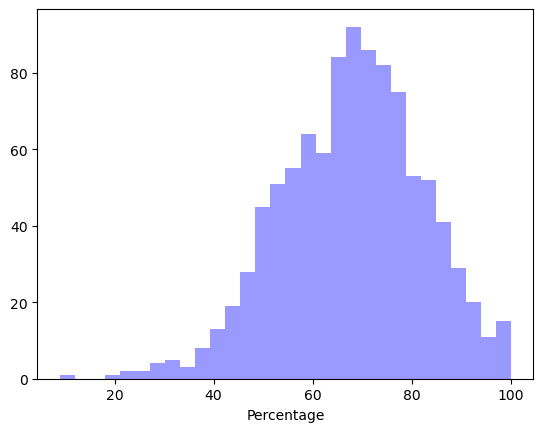

In [24]:
ax=sns.distplot(df['Percentage'], kde = False, color ='blue', bins = 30)
fig=ax.get_figure()
fig.savefig("../results/Distribution_percentage.png")

#### The below scatter plot illustrates the relation between avg score and math score then it is grouped by gender

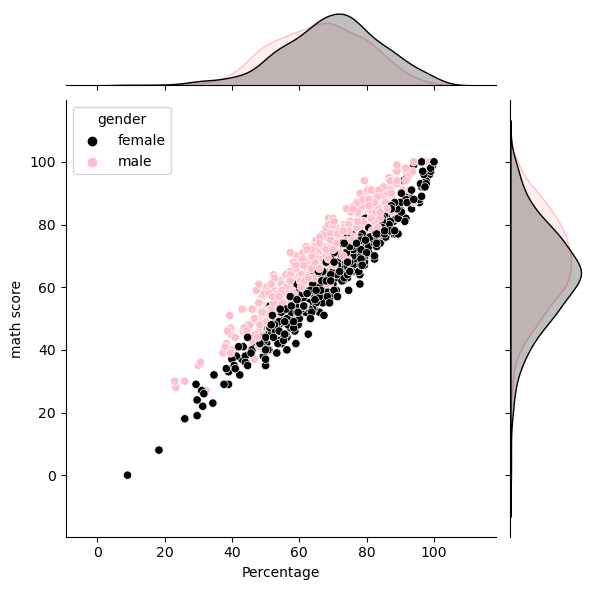

In [26]:
custom_palette = ["black", "pink"]
ax=sns.jointplot(x ='Percentage', y ='math score',hue="gender", data = df,palette=custom_palette)

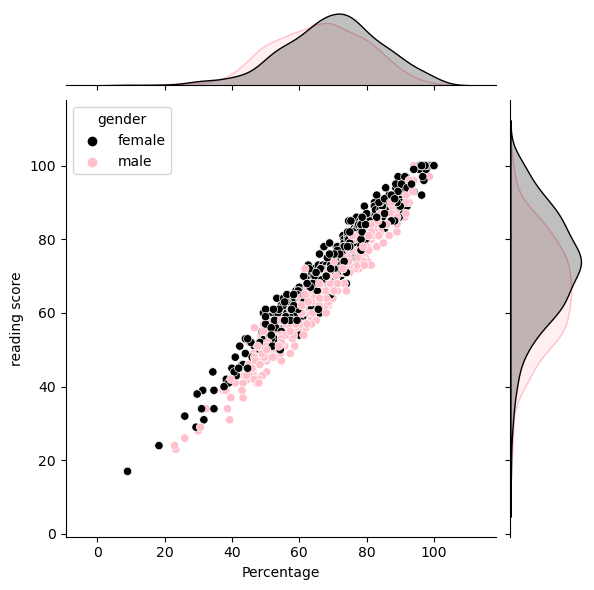

In [27]:
custom_palette = ["black", "pink"]
ax=sns.jointplot(x ='Percentage', y ='reading score',hue="gender", data = df,palette=custom_palette)

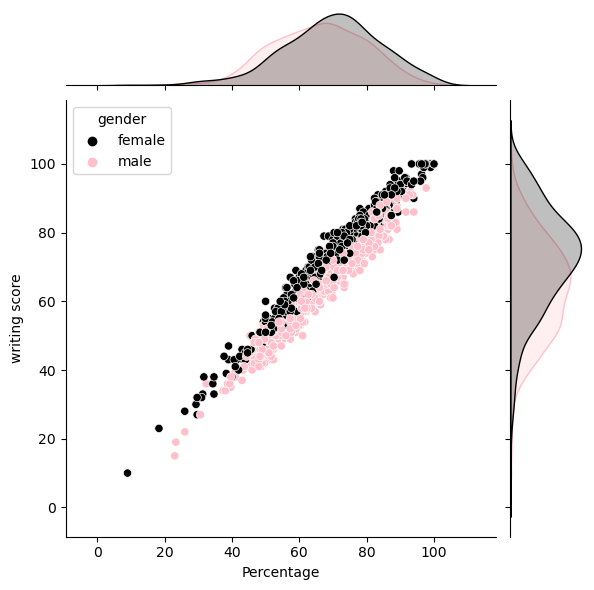

In [28]:
custom_palette = ["black", "pink"]
ax=sns.jointplot(x ='Percentage', y ='writing score',hue="gender", data = df,palette=custom_palette)